In [885]:
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [886]:
data = pd.read_csv('train.csv', header=0)

In [887]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

In [888]:
# Checking for missing values in the dataset
data.isnull().values.any()

True

In [889]:
# Number of columns having null values
data.isna().any().sum()

3

In [890]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

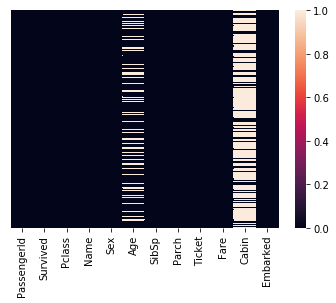

In [891]:
sns.heatmap(data.isnull(), yticklabels = False)

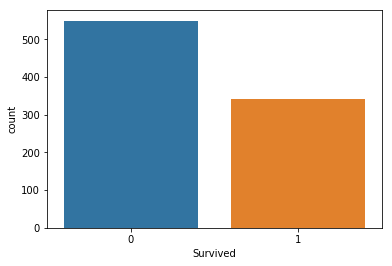

In [892]:
sns.countplot(x='Survived',data = data)

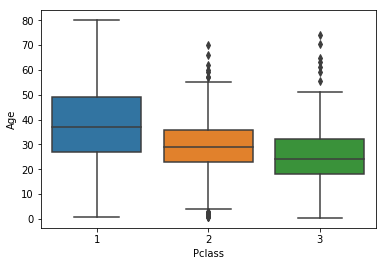

In [893]:
sns.boxplot(x=data['Pclass'],y=data['Age'], data = data)

In [894]:
# It can be seen that Passengers from class 1 are ~35 years, class 2 are ~30 years and class 3 are ~25 years. 
#The null values for age can be replaced with the average values from each passenger class.

def replaceNullAge(x):
    Age = x[0] 
    Pclass = x[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 35
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age


In [895]:
# Function call
data['Age'] = data[['Age','Pclass']].apply(replaceNullAge, axis = 1)

In [896]:
data['Age'].isnull().any()

False

In [897]:
# Number of null values in Embarked column
data['Embarked'].isna().sum()

2

In [898]:
data['Embarked'].dropna(inplace = True)

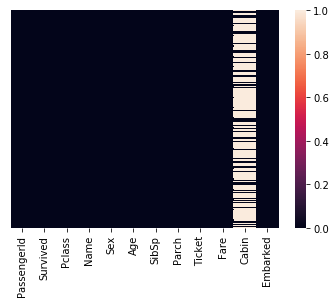

In [899]:
sns.heatmap(data.isnull(), yticklabels = False)

In [900]:
data.dropna(inplace=True)

In [901]:
data.drop('Cabin', axis = 1, inplace = True)

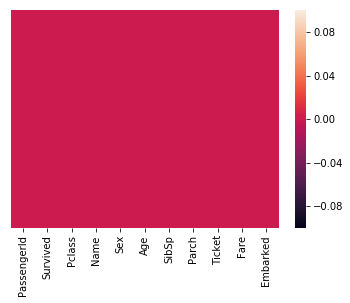

In [902]:
sns.heatmap(data.isnull(), yticklabels = False)

In [903]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


# Data Preparation

In [904]:
# Convert to numerical values

In [905]:
sex_binary = {'male':0,'female':1}
data['Sex'] = data['Sex'].map(sex_binary)

In [906]:
data['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [907]:
embarked_binary = {'S':0,'C':1,'Q':2}
data['Embarked'] = data['Embarked'].map(embarked_binary)

In [908]:
# We do not get much information from PassengerId, Name and ticket columns. Hence dropping it
data.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)

In [909]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,1
3,1,1,1,35.0,1,0,53.1000,0
6,0,1,0,54.0,0,0,51.8625,0
10,1,3,1,4.0,1,1,16.7000,0
11,1,1,1,58.0,0,0,26.5500,0


In [910]:
len(data)

202

In [911]:
Y = data['Survived']

In [912]:
# X will hold everything except 'Survived' column
X = data.drop('Survived', axis = 1)

In [913]:
# Split the data - 80/20

In [914]:
from sklearn.model_selection import train_test_split

In [915]:
x_Train, x_Test, y_Train, y_Test = train_test_split(X,Y, test_size = 0.40, random_state = 0)

# Random Forest Classification

In [916]:
randomForest_model = RandomForestClassifier()

In [917]:
randomForest_model = randomForest_model.fit(x_Train, y_Train)

/Users/apoorva/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [918]:
randomForest_model = randomForest_model.predict(x_Test)

In [919]:
from sklearn import metrics
metrics.accuracy_score(y_Test, randomForest_model)

0.654320987654321

# Part 2 - Finding the best estimators

In [920]:
parameters = {'max_depth': [2,4,10,15,100,200], 'n_estimators':[5,50,100,200,500]}

In [921]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

In [922]:
gridCV = GridSearchCV(rf, parameters, cv=5)
gridFit = gridCV.fit(X,Y)

/Users/apoorva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [923]:
gridFit.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [924]:
# Rerunning the model using the above best estimators

In [925]:
randomForest_model_best = RandomForestClassifier(max_depth = 10, n_estimators = 5)

# Random Forest Model

In [926]:
randomForest_model_best = randomForest_model_best.fit(x_Train, y_Train)

In [927]:
best_predict = randomForest_model_best.predict(x_Test)

In [928]:
best_predict

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [929]:
metrics.accuracy_score(y_Test, best_predict)

0.6790123456790124

# Testing the model using test.csv 

In [930]:
data_test = pd.read_csv('test.csv',header=0)

In [931]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [932]:
len(data_test)

418

In [933]:
# Removing columns that are not required
data_test.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

In [934]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [935]:
sex_binary = {'male':0,'female':1}
data_test['Sex'] = data_test['Sex'].map(sex_binary)

In [936]:
embarked_binary = {'S':0,'C':1,'Q':2}
data_test['Embarked'] = data_test['Embarked'].map(embarked_binary)

In [937]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [938]:
data_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,0.464115
std,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.685516
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [939]:
data_test.isna().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

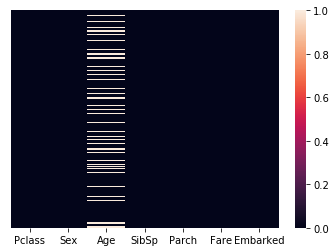

In [940]:
sns.heatmap(data_test.isnull(), yticklabels = False)

In [941]:
data_test['Age'].isna().sum()

86

In [942]:
len(data_test)

418

In [943]:
data_test.fillna(0, inplace = True)

In [944]:
data_test.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [945]:
X = data_test

# Prediction using the above created model

In [946]:
# using the above trained model randomForest_model_best to predict 
testdata_prediction = randomForest_model_best.predict(X)

In [947]:
testdata_prediction

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,